In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('processed_m_h_r.csv')
print(data.head())

# Part 1: Data Exploration
## Display summary statistics
print(data.describe())

## Check for missing values
print(data.isna().sum())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  15.0      98.0         86  high risk   
1   35         140           90  13.0      98.0         70  high risk   
2   29          90           70   8.0     100.0         80  high risk   
3   30         140           85   7.0      98.0         70  high risk   
4   35         120           60   6.1      98.0         76   low risk   

          MAP  PP  Temp_Diff  
0   96.666667  50        0.0  
1  106.666667  50        0.0  
2   76.666667  20        2.0  
3  103.333333  55        0.0  
4   80.000000  60        0.0  
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1012.000000  1012.000000  1012.000000  1012.000000  1012.000000   
mean     29.899209   113.184783    76.463439     8.727619    98.666403   
std      13.473560    18.419618    13.899372     3.296583     1.372421   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%  

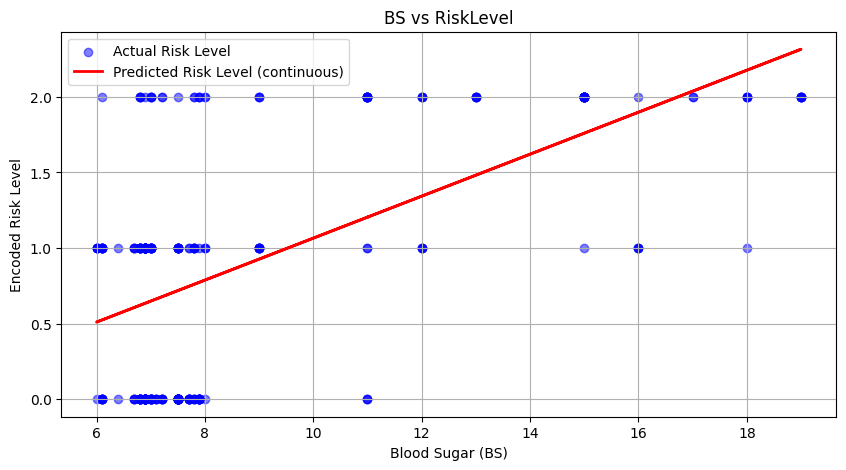

R-squared: 0.3199573979053061
RMSE: 0.6503076360298973
Confusion Matrix:
[[  0 127   0]
 [  0  99   6]
 [  0  43  29]]


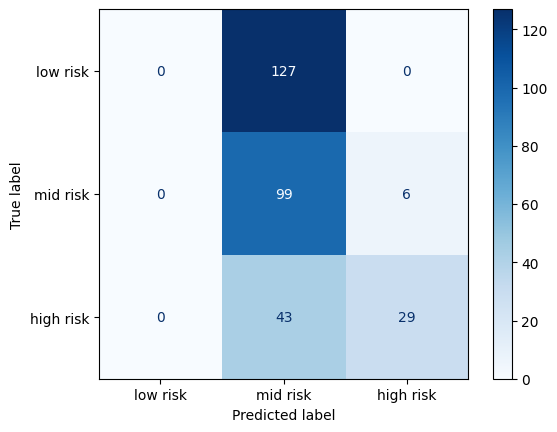

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Encode RiskLevel as numeric
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
data['RiskLevelEncoded'] = data['RiskLevel'].map(risk_mapping)

# Part 2: Simple Linear Regression
## Data preparation
X = data[['BS']]  # Use Blood Sugar as the predictor
y = data['RiskLevelEncoded']  # Use encoded RiskLevel as the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model training
model = LinearRegression()
model.fit(X_train, y_train)

## Predictions
y_pred = model.predict(X_test)

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred).astype(int)

# Ensure predictions are within valid range [0, 2]
y_pred_rounded = np.clip(y_pred_rounded, 0, 2)

## Visualization of predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Risk Level', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Predicted Risk Level (continuous)', linewidth=2)
plt.title('BS vs RiskLevel')
plt.xlabel('Blood Sugar (BS)')
plt.ylabel('Encoded Risk Level')
plt.legend()
plt.grid(True)
plt.show()

## Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rounded)
print("Confusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low risk", "mid risk", "high risk"])
disp.plot(cmap='Blues')
plt.show()


**What does this mean?**

We trained a linear regression model to predict risk level from only blood sugar. It uses 70% of the dataset in training.

From it's confusion matrix we see that it is best at predicting mid risk cases with about a 33% accuracy and a 94% precision. The high precision is largely due to guessing "mid risk" over 90% of the time.

We noticed it is only 40% accurate for high risk cases which is unsatisfactory.

Going forward we can use this model as a baseline to compare more sophisticated models against.

In [ ]:
# Models and Features
models = {
    "Model 1: BS Only": (['BS'], 'RiskLevelEncoded'),
    "Model 2: Five Features": (['Age', 'BS', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate'], 'RiskLevelEncoded'),
    "Model 3: Engineered Features": (['Age', 'BS', 'SystolicBP', 'DiastolicBP', 'Temp_Diff', 'HeartRate', 'MAP', 'PP'], 'RiskLevelEncoded')
}

results = []
for name, (features, target) in models.items():
    X, y = data[features], data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append((name, r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))))

# Results
results_df = pd.DataFrame(results, columns=['Model', 'R-squared', 'RMSE'])
print(results_df)


                          Model  R-squared      RMSE
0              Model 1: BS Only   0.319957  0.650308
1        Model 2: Five Features   0.429902  0.595423
2  Model 3: Engineered Features   0.424911  0.598024


**Comparing Models**

The Five Feature model outperforms the BS only model. This can be seen by its higher R-squared value, ~0.43 compared to ~0.32, and lower RMSE value, ~0.595 compared to ~0.650.

The model with engineered features has marginally worse performance to the five feature model which is only apparent at the thousandths place.

Next we wanted to compare polynomial regressions using each feature set.

                 Model  Degree  R-squared      RMSE
0              BS Only       1   0.319957  0.650308
1              BS Only       2   0.320773  0.649918
2              BS Only       3   0.326531  0.647157
3        Five Features       1   0.260560  0.678113
4        Five Features       2   0.334951  0.643099
5        Five Features       3   0.299728  0.659909
6  Engineered Features       1   0.259606  0.678551
7  Engineered Features       2   0.334953  0.643098
8  Engineered Features       3   0.296176  0.661581


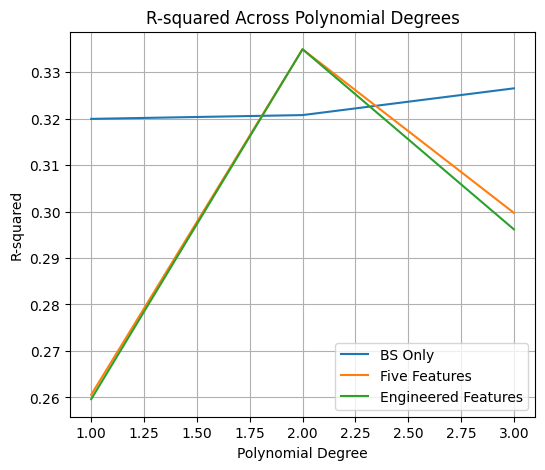

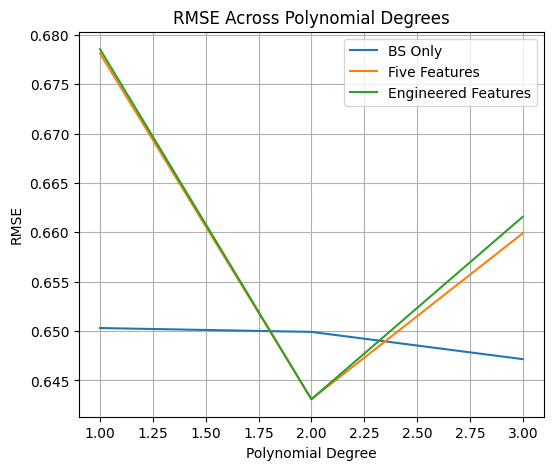

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Define models
models = {
    "BS Only": ['BS'],
    "Five Features": ['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate'],
    "Engineered Features": ['Age', 'SystolicBP', 'DiastolicBP', 'Temp_Diff', 'HeartRate', 'MAP', 'PP']
}

# Store results
results = []

# Loop through each model and polynomial degree
for model_name, features in models.items():
    X = data[features]
    y = data['RiskLevelEncoded']

    for degree in range(1, 4):  # Polynomial degrees 1 to 3
        # Polynomial transformation
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

        # Train model
        poly_model = LinearRegression()
        poly_model.fit(X_train, y_train)

        # Predictions
        y_pred = poly_model.predict(X_test)

        # Evaluation metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append((model_name, degree, r2, rmse))


# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Degree', 'R-squared', 'RMSE'])
print(results_df)

# Plot R-squared comparison across degrees
plt.figure(figsize=(6, 5))
for model_name in models.keys():
    model_results = results_df[results_df['Model'] == model_name]
    plt.plot(model_results['Degree'], model_results['R-squared'], label=model_name)
plt.title('R-squared Across Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared')
plt.legend()
plt.grid(True)
plt.show()

# Plot RMSE comparison across degrees
plt.figure(figsize=(6, 5))
for model_name in models.keys():
    model_results = results_df[results_df['Model'] == model_name]
    plt.plot(model_results['Degree'], model_results['RMSE'], label=model_name)
plt.title('RMSE Across Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


**Comparing Polynomial Models**

The BS only model does not significantly improve as polynomial count increases.

The best models are the higher feature models of degree 2. However, they are only slightly better than BS only. They are nearly identical at degree one and two but diverge at 3.

Not shown, the multi-feature models become significantly worse at higher degrees and fail to outperform the BS only up to degree 10.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pydot
from IPython.display import display, Image

**Generating training and test sets**

We explored 3 different training and test sets:

**Standard**

Our first set pair denoted X and y, are partitions of the raw data.

**Engineered**

Our next set pair Xe and y, include engineered features for the same observations.

**Augmented**

Our final pair of sets Xa and ya, have had the high risk observations cloned twice and concatenated to the training set. This increases the relative proportion of high risk cases from ~24% to ~48% of the set. Our goal for this was to priortize learning to correctly identify high risk cases over other cases.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Encode RiskLevel as integers
data['RiskLevelEncoded'] = data['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})

# Augment high-risk cases
high_risk = data[data['RiskLevelEncoded'] == 2]
data_augmented = pd.concat([data, high_risk, high_risk], ignore_index=True)

# Features and target
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
Xe = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'Temp_Diff', 'HeartRate', 'MAP', 'PP']]
Xa = data_augmented[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'Temp_Diff', 'HeartRate', 'MAP', 'PP']]
y = data['RiskLevelEncoded']
ya = data_augmented['RiskLevelEncoded']

# Split data into training and test sets (consistent splits)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
Xe_train, Xe_test = Xe.loc[X_train.index], Xe.loc[X_test.index]
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.3, random_state=42, stratify=ya)

# Scale features
scaler = MinMaxScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
Xe_train_scaled, Xe_test_scaled = scaler.fit_transform(Xe_train), scaler.transform(Xe_test)
Xa_train_scaled, Xa_test_scaled = scaler.fit_transform(Xa_train), scaler.transform(Xa_test)

# Baseline accuracy
most_common_class = y_train.mode()[0]
baseline_predictions = np.full(shape=y_test.shape, fill_value=most_common_class)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Accuracy (Always Guessing Most Common Category):", baseline_accuracy)


Baseline Accuracy (Always Guessing Most Common Category): 0.3980263157894737


**What is "Baseline Accuracy?**

We decided to evaluate accuracy against the strategy of picking the most common answer which is low risk. We wanted to know this value to help contextualize what it might mean if a model is 40% accurate or 80% accurate. Having ~40% as a baseline simply gives us a way to better compare models.

In [ ]:
# Create shallow neural network
def create_shallow_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation='relu', input_shape=(6,)),
        tf.keras.layers.Dense(6, activation='tanh'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Visualize the model architecture
    print("\nShallow Network Architecture:")
    model.summary()

    return model


In [ ]:
# Create deep neural network
def create_deep_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(6,)),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Visualize the model architecture
    print("\nDeep Network Architecture:")
    model.summary()

    return model

In [ ]:
# Create engineered features in input
def create_engfeat_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(8,)),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Visualize the model architecture
    print("\nDeep Network Architecture with Engineered Features:")
    model.summary()

    return model

In [ ]:
# Using augmented data set (high risk are cloned twice)
def create_aug_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(8,)),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Visualize the model architecture
    print("\nDeep Network Architecture with Augmented Data:")
    model.summary()

    return model

**Setting Model Architecture**

We compared a shallow 3-layer model to deep 6 layer models. Our hypothesis was that adding layers would increase accuracy.

Our last layers have 3 units with the softmax activation function. This is important for categorization models. THe model works by calculating the probability of each category and the most likely category is the prediction chosen.

Another important detail is that the input shape is 8 instead of 6 for the models we trained with engineered features.

Our dense layers use relu and tanh activation functions which is common practice. We tested other activation functions such as sigmoid but those layers had a neutral or negative affect on performance.

In [ ]:
# Training parameters
epochs = 64
batch_size = 32

**Parameter Tuning**

We tried lower batch sizes and our training loss and accuracy was less stable and with small batch sizes, did not converge in training. A batch size of 32 mitigated this.

We chose 64 epochs to see the effect of longer training. We did not find evidence of overfitting with our parameters. However, continued training only improved validation performance marginally beyond 30 epochs.

In [ ]:
%%time

# Compile and train shallow network
shallow_model = create_shallow_network()
shallow_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
shallow_history = shallow_model.fit(X_train_scaled, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.2,
                                  verbose=2)


Shallow Network Architecture:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_115 (Dense)                    │ (None, 12)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183 (732.00 B)

 Trainable params: 183 (732.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/64
18/18 - 1s - 65ms/step - accuracy: 0.4099 - loss: 1.1153 - val_accuracy: 0.3944 - val_loss: 1.1149
Epoch 2/64
18/18 - 0s - 9ms/step - accuracy: 0.4541 - loss: 1.1009 - val_accuracy: 0.3451 - val_loss: 1.1034
Epoch 3/64
18/18 - 0s - 7ms/step - accuracy: 0.4505 - loss: 1.0918 - val_accuracy: 0.3803 - val_loss: 1.0941
Epoch 4/64
18/18 - 0s - 7ms/step - accuracy: 0.4682 - loss: 1.0832 - val_accuracy: 0.4014 - val_loss: 1.0859
Epoch 5/64
18/18 - 0s - 8ms/step - accuracy: 0.4682 - loss: 1.0763 - val_accuracy: 0.4296 - val_loss: 1.0786
Epoch 6/64
18/18 - 0s - 5ms/step - accuracy: 0.4717 - loss: 1.0704 - val_accuracy: 0.4014 - val_loss: 1.0721
Epoch 7/64
18/18 - 0s - 5ms/step - accuracy: 0.5088 - loss: 1.0622 - val_accuracy: 0.4789 - val_loss: 1.0642
Epoch 8/64
18/18 - 0s - 8ms/step - accuracy: 0.5053 - loss: 1.0546 - val_accuracy: 0.5000 - val_loss: 1.0563
Epoch 9/64
18/18 - 0s - 5ms/step - accuracy: 0.5318 - loss: 1.0462 - val_accuracy: 0.5211 - val_loss: 1.0475
Epoch 10/64
18/18 

In [ ]:
%%time

# Compile and train deep network
deep_model = create_deep_network()
deep_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
deep_history = deep_model.fit(X_train_scaled, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2,
                            verbose=2)


Deep Network Architecture:


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)                    │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,923 (46.57 KB)

 Trainable params: 11,923 (46.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/64
18/18 - 2s - 108ms/step - accuracy: 0.4276 - loss: 1.0811 - val_accuracy: 0.4648 - val_loss: 1.0581
Epoch 2/64
18/18 - 0s - 5ms/step - accuracy: 0.4452 - loss: 1.0445 - val_accuracy: 0.4859 - val_loss: 1.0213
Epoch 3/64
18/18 - 0s - 4ms/step - accuracy: 0.4841 - loss: 1.0062 - val_accuracy: 0.4789 - val_loss: 0.9908
Epoch 4/64
18/18 - 0s - 5ms/step - accuracy: 0.4929 - loss: 0.9709 - val_accuracy: 0.4437 - val_loss: 0.9834
Epoch 5/64
18/18 - 0s - 5ms/step - accuracy: 0.5088 - loss: 0.9402 - val_accuracy: 0.4859 - val_loss: 0.9429
Epoch 6/64
18/18 - 0s - 7ms/step - accuracy: 0.4912 - loss: 0.9092 - val_accuracy: 0.5352 - val_loss: 0.9179
Epoch 7/64
18/18 - 0s - 4ms/step - accuracy: 0.5760 - loss: 0.8966 - val_accuracy: 0.6056 - val_loss: 0.9063
Epoch 8/64
18/18 - 0s - 5ms/step - accuracy: 0.6396 - loss: 0.8711 - val_accuracy: 0.6408 - val_loss: 0.8877
Epoch 9/64
18/18 - 0s - 5ms/step - accuracy: 0.6643 - loss: 0.8699 - val_accuracy: 0.5775 - val_loss: 0.9122
Epoch 10/64
18/18

In [ ]:
%%time

# Compile and train deep network
deep_engfeat_model = create_engfeat_network()
deep_engfeat_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
deep_engfeat_history = deep_engfeat_model.fit(Xe_train_scaled, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2,
                            verbose=2)


Deep Network Architecture with Engineered Features:


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)                    │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,179 (47.57 KB)

 Trainable params: 12,179 (47.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/64
18/18 - 2s - 106ms/step - accuracy: 0.4258 - loss: 1.0736 - val_accuracy: 0.5352 - val_loss: 1.0446
Epoch 2/64
18/18 - 0s - 5ms/step - accuracy: 0.6007 - loss: 1.0073 - val_accuracy: 0.4507 - val_loss: 0.9883
Epoch 3/64
18/18 - 0s - 7ms/step - accuracy: 0.5442 - loss: 0.9359 - val_accuracy: 0.6197 - val_loss: 0.9335
Epoch 4/64
18/18 - 0s - 8ms/step - accuracy: 0.6219 - loss: 0.8776 - val_accuracy: 0.6197 - val_loss: 0.8883
Epoch 5/64
18/18 - 0s - 8ms/step - accuracy: 0.6466 - loss: 0.8306 - val_accuracy: 0.5634 - val_loss: 0.8778
Epoch 6/64
18/18 - 0s - 7ms/step - accuracy: 0.6837 - loss: 0.7957 - val_accuracy: 0.6268 - val_loss: 0.8462
Epoch 7/64
18/18 - 0s - 5ms/step - accuracy: 0.6784 - loss: 0.7743 - val_accuracy: 0.6338 - val_loss: 0.8303
Epoch 8/64
18/18 - 0s - 8ms/step - accuracy: 0.6678 - loss: 0.7707 - val_accuracy: 0.6338 - val_loss: 0.8458
Epoch 9/64
18/18 - 0s - 7ms/step - accuracy: 0.6696 - loss: 0.7455 - val_accuracy: 0.6479 - val_loss: 0.8019
Epoch 10/64
18/18

In [ ]:
%%time

# Compile and train deep network
deep_aug_model = create_aug_network()
deep_aug_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
deep_aug_history = deep_aug_model.fit(Xa_train_scaled, ya_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2,
                            verbose=2)


Deep Network Architecture with Augmented Data:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_136 (Dense)                    │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,179 (47.57 KB)

 Trainable params: 12,179 (47.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/64
28/28 - 2s - 79ms/step - accuracy: 0.3915 - loss: 1.0483 - val_accuracy: 0.5596 - val_loss: 1.0051
Epoch 2/64
28/28 - 0s - 4ms/step - accuracy: 0.5155 - loss: 0.9631 - val_accuracy: 0.5596 - val_loss: 0.9463
Epoch 3/64
28/28 - 0s - 5ms/step - accuracy: 0.5212 - loss: 0.8892 - val_accuracy: 0.5872 - val_loss: 0.8530
Epoch 4/64
28/28 - 0s - 4ms/step - accuracy: 0.5947 - loss: 0.8097 - val_accuracy: 0.6239 - val_loss: 0.7973
Epoch 5/64
28/28 - 0s - 4ms/step - accuracy: 0.6958 - loss: 0.7447 - val_accuracy: 0.7110 - val_loss: 0.7697
Epoch 6/64
28/28 - 0s - 4ms/step - accuracy: 0.7130 - loss: 0.7074 - val_accuracy: 0.6927 - val_loss: 0.7413
Epoch 7/64
28/28 - 0s - 5ms/step - accuracy: 0.7164 - loss: 0.6828 - val_accuracy: 0.7110 - val_loss: 0.7794
Epoch 8/64
28/28 - 0s - 4ms/step - accuracy: 0.7440 - loss: 0.6630 - val_accuracy: 0.6835 - val_loss: 0.7186
Epoch 9/64
28/28 - 0s - 5ms/step - accuracy: 0.7290 - loss: 0.6568 - val_accuracy: 0.6743 - val_loss: 0.7205
Epoch 10/64
28/28 

**Training Loss Choice**

We used "sparse_categorical_crossentropy" to calculate loss. To do this, we mapped low, mid and high risks to the values 0, 1, and 2. This allows loss to be calculated.

Another approach we considered was hot-encoding and regular categorical crossentropy. This encodes risk as three vectors [1,0,0], [0,1,0], and [0,0,1]. This approach is more useful when categories are totally distinct and have no heirarchy. However our data made sense when represented in a single dimension as 0, 1, and 2 because they all measure risk in different amounts.

Baseline Accuracy (Guess Most Common): 0.3980
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Shallow Network Results:
Training Accuracy: 0.6525
Test Accuracy: 0.6250


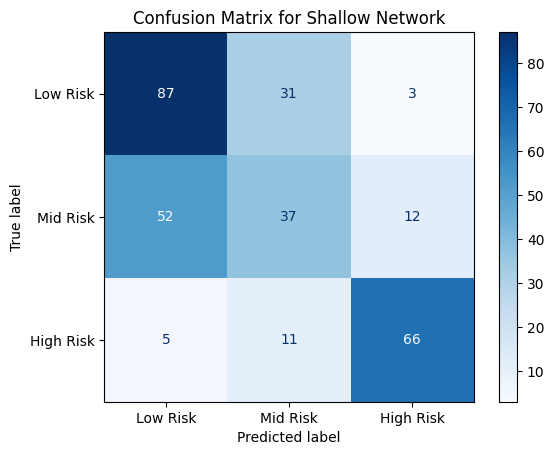

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Deep Network Results:
Training Accuracy: 0.7500
Test Accuracy: 0.6776


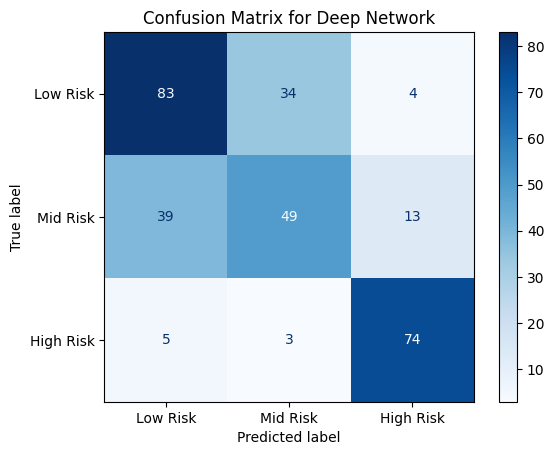

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Deep Network with Engineered Features Results:
Training Accuracy: 0.7429
Test Accuracy: 0.6974


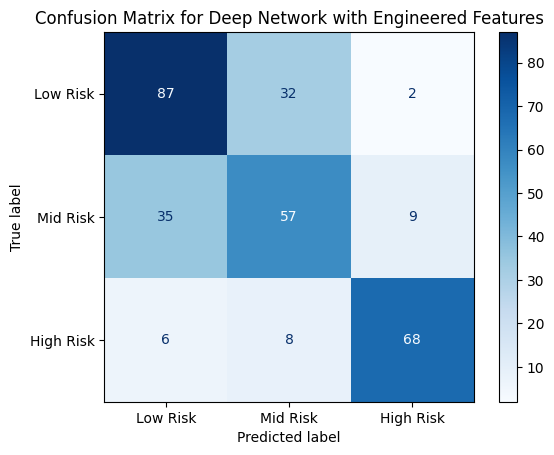

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Deep Network with Augmented Data Results:
Training Accuracy: 0.8145
Test Accuracy: 0.6546


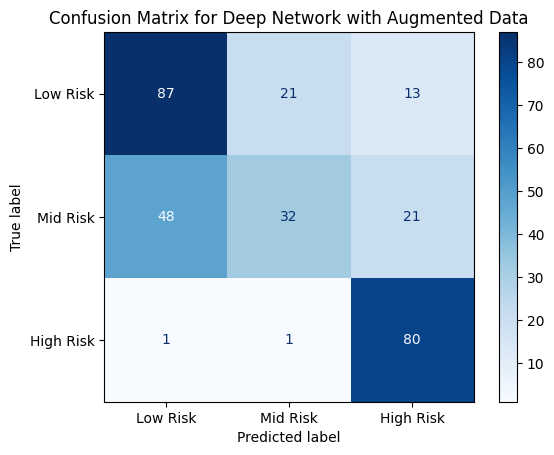

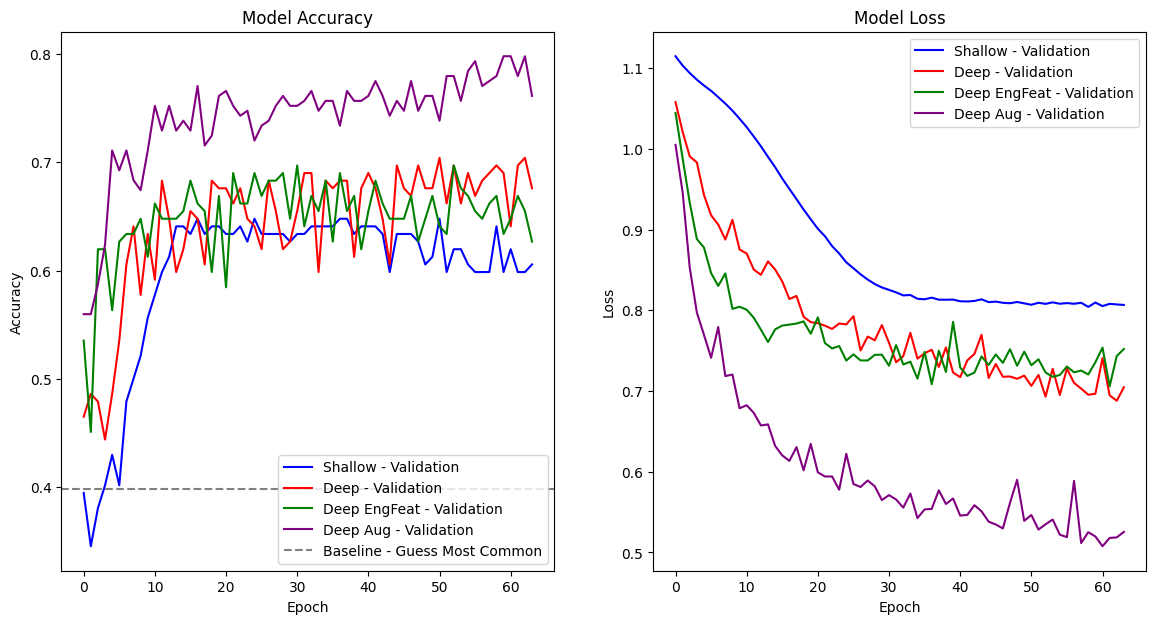

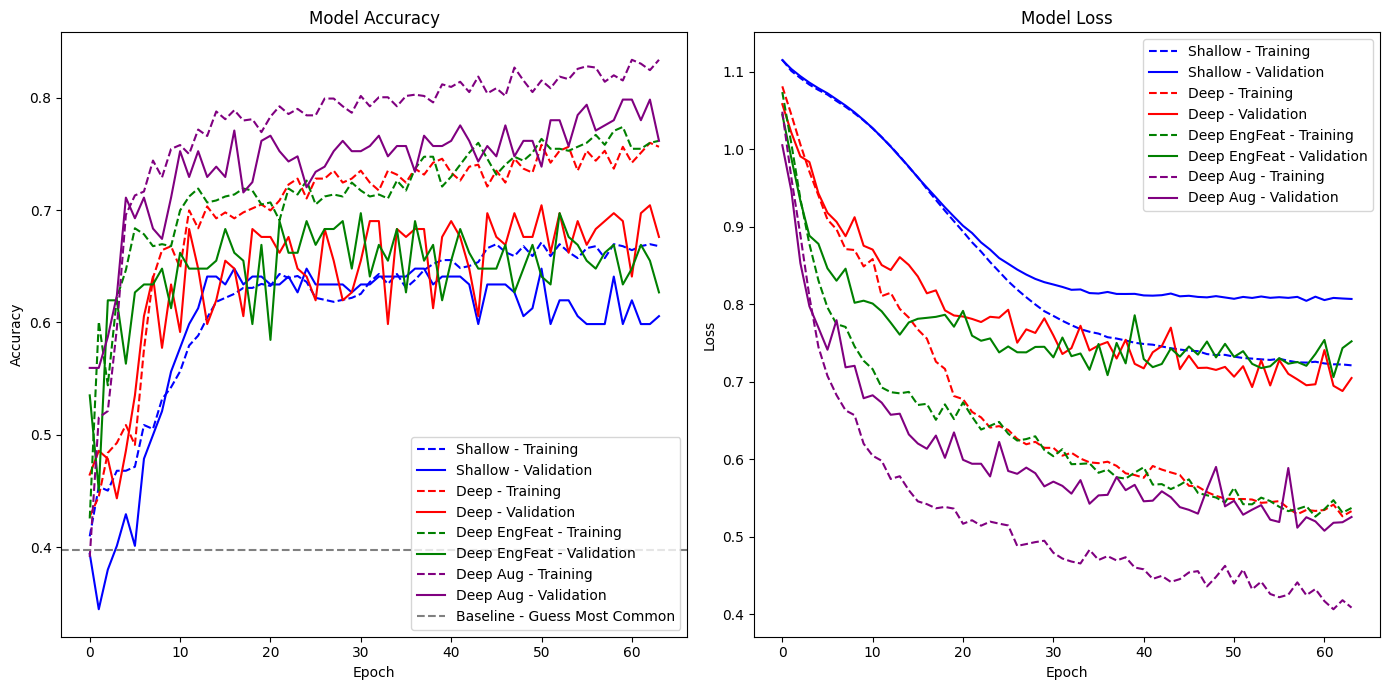

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate models and generate confusion matrices
def evaluate_model_with_confusion_matrix(model, model_name, X_train, y_train, X_test, y_test):
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Predictions
    y_pred = model.predict(X_test).argmax(axis=1)  # Convert probabilities to class labels if using softmax output

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Results:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Risk', 'Mid Risk', 'High Risk'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    return test_accuracy

# Ensure scaled data is NumPy arrays
Xa_train_scaled = np.array(Xa_train_scaled)
Xa_test_scaled = np.array(Xa_test_scaled)

# Evaluate models and plot confusion matrices
print(f"Baseline Accuracy (Guess Most Common): {baseline_accuracy:.4f}")
shallow_accuracy = evaluate_model_with_confusion_matrix(shallow_model, "Shallow Network", X_train_scaled, y_train, X_test_scaled, y_test)
deep_accuracy = evaluate_model_with_confusion_matrix(deep_model, "Deep Network", X_train_scaled, y_train, X_test_scaled, y_test)
engfeat_accuracy = evaluate_model_with_confusion_matrix(deep_engfeat_model, "Deep Network with Engineered Features", Xe_train_scaled, y_train, Xe_test_scaled, y_test)
aug_accuracy = evaluate_model_with_confusion_matrix(deep_aug_model, "Deep Network with Augmented Data", Xa_train_scaled, ya_train, Xe_test_scaled, y_test)

# Plot testing history
plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(shallow_history.history['val_accuracy'], linestyle='-', color='blue', label='Shallow - Validation')
plt.plot(deep_history.history['val_accuracy'], linestyle='-', color='red', label='Deep - Validation')
plt.plot(deep_engfeat_history.history['val_accuracy'], linestyle='-', color='green', label='Deep EngFeat - Validation')
plt.plot(deep_aug_history.history['val_accuracy'], linestyle='-', color='purple', label='Deep Aug - Validation')
plt.axhline(y=baseline_accuracy, color='gray', linestyle='--', label='Baseline - Guess Most Common')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(shallow_history.history['val_loss'], linestyle='-', color='blue', label='Shallow - Validation')
plt.plot(deep_history.history['val_loss'], linestyle='-', color='red', label='Deep - Validation')
plt.plot(deep_engfeat_history.history['val_loss'], linestyle='-', color='green', label='Deep EngFeat - Validation')
plt.plot(deep_aug_history.history['val_loss'], linestyle='-', color='purple', label='Deep Aug - Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot test and training history
plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(shallow_history.history['accuracy'], linestyle='--', color='blue', label='Shallow - Training')
plt.plot(shallow_history.history['val_accuracy'], linestyle='-', color='blue', label='Shallow - Validation')
plt.plot(deep_history.history['accuracy'], linestyle='--', color='red', label='Deep - Training')
plt.plot(deep_history.history['val_accuracy'], linestyle='-', color='red', label='Deep - Validation')
plt.plot(deep_engfeat_history.history['accuracy'], linestyle='--', color='green', label='Deep EngFeat - Training')
plt.plot(deep_engfeat_history.history['val_accuracy'], linestyle='-', color='green', label='Deep EngFeat - Validation')
plt.plot(deep_aug_history.history['accuracy'], linestyle='--', color='purple', label='Deep Aug - Training')
plt.plot(deep_aug_history.history['val_accuracy'], linestyle='-', color='purple', label='Deep Aug - Validation')
plt.axhline(y=baseline_accuracy, color='gray', linestyle='--', label='Baseline - Guess Most Common')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(shallow_history.history['loss'], linestyle='--', color='blue', label='Shallow - Training')
plt.plot(shallow_history.history['val_loss'], linestyle='-', color='blue', label='Shallow - Validation')
plt.plot(deep_history.history['loss'], linestyle='--', color='red', label='Deep - Training')
plt.plot(deep_history.history['val_loss'], linestyle='-', color='red', label='Deep - Validation')
plt.plot(deep_engfeat_history.history['loss'], linestyle='--', color='green', label='Deep EngFeat - Training')
plt.plot(deep_engfeat_history.history['val_loss'], linestyle='-', color='green', label='Deep EngFeat - Validation')
plt.plot(deep_aug_history.history['loss'], linestyle='--', color='purple', label='Deep Aug - Training')
plt.plot(deep_aug_history.history['val_loss'], linestyle='-', color='purple', label='Deep Aug - Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Confusion Matrix**

Mid risk cases seem most difficult to accurately identify in all models.

Including engineered features had a neutral or slightly positive effect on performance. Variance in training was enough to make the comparison inconclusive.

Augmenting the training data makes the model more accurately identify high risk cases. It is ~97.5% accurate! However, it also becomes less precise in doing so. going from around 80-90% to ~70%. Overall, we belived this to be favorable because it is most costly to miss high risk cases.

The augmented model stuggles more in identifying mid risk cases which represents the smallest portion of the augmented training data. This seems to validate our hypothesis that the model's ability to "learn" to identify a category is correlated with its representaion within the training set.


**Training Accuracy and Loss Analysis**

Its important to note that training and validation sets for 'Deep Aug' are augmented to have a greater proportion of high risk cases than the original set. The augmented set has ~48 high risk which is even greater than the original set's most common case of ~33% low risk. We hypothezied this made it easier for the augmented model to achieve lower loss and higher accuracy. Therfore, we feel the confucion matrix which is generated from the original data is more representative of performance.

For all models, validation accuracy and loss continues to fluctuate over time. We decided to try adjusting the learning rate and including learning rate decay.

Also, we wanted to add dropout to avoid overfitting which may contribute to dips in validation accuracy.



Epoch 1/128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5825 - loss: 0.9985
Epoch 1: val_accuracy improved from -inf to 0.26974, saving model to best_weights.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5855 - loss: 0.9920 - val_accuracy: 0.2697 - val_loss: 1.3778
Epoch 2/128
25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7279 - loss: 0.6650
Epoch 2: val_accuracy did not improve from 0.26974
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7252 - loss: 0.6663 - val_accuracy: 0.2697 - val_loss: 1.2466
Epoch 3/128
26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7447 - loss: 0.6293
Epoch 3: val_accuracy did not improve from 0.26974
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7383 - loss: 0.6327 - val_accuracy: 0.2697 - val_loss: 1.3571
Epoch 4/128
31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7171 - loss: 0.6073
Epoch 4: val_accuracy did not improve from 0.26974
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7177 - loss: 0.6078 - val_accura

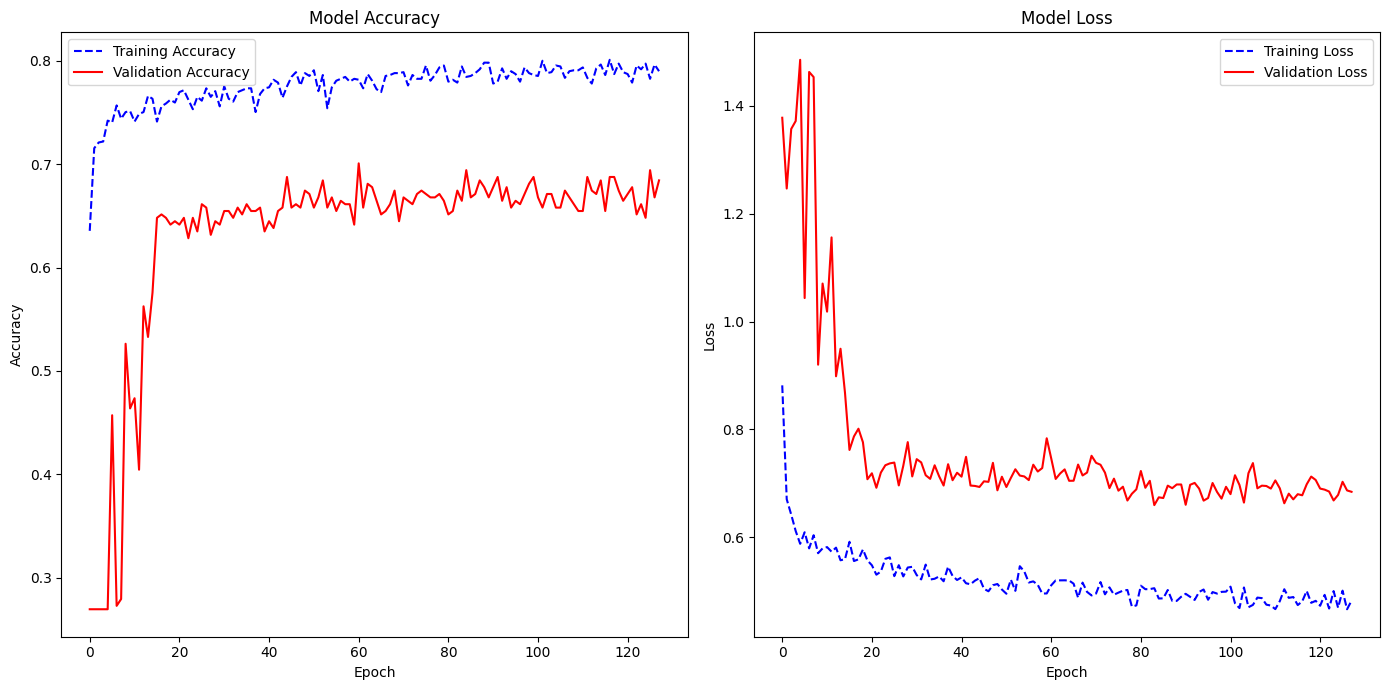


Test Accuracy on y_test: 0.7007
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


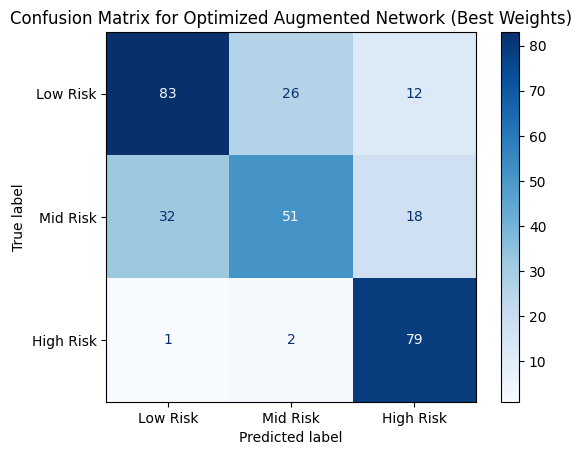

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the optimized augmented network
def optimized_aug_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='elu', input_shape=(8,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(48, activation='tanh'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

# Learning Rate Scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=8000,
    decay_rate=0.95
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model = optimized_aug_network()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Save the best weights using ModelCheckpoint
checkpoint_path = "best_weights.keras"
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',  # Save based on validation loss
    save_best_only=True,
    verbose=1
)

# Train the model
epochs = 128
batch_size = 32

history = model.fit(
    Xa_train_scaled, ya_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(Xe_test_scaled, y_test),
    callbacks=[checkpoint],  # Include ModelCheckpoint callback
    verbose=1
)

# Load the best weights
model.load_weights(checkpoint_path)
print("\nBest weights loaded.")

# Plot training and validation metrics
plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linestyle='--', color='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], linestyle='-', color='red', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linestyle='--', color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], linestyle='-', color='red', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set and print accuracy
test_loss, test_accuracy = model.evaluate(Xe_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy on y_test: {test_accuracy:.4f}")

# Confusion Matrix on y_test
y_pred = model.predict(Xe_test_scaled).argmax(axis=1)  # Convert predictions to class labels
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Risk', 'Mid Risk', 'High Risk'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Optimized Augmented Network (Best Weights)")
plt.show()


**Optimizing Layer Archeitecture**

We took activation functions and dense layer units from our keras tuner run. We iteratively tested learning parameters and selected the combination that performed best.

Learning parameters had a surprising effect on model performance but also performance variance between runs with identical parameters. It was interesting that runs with identical parameters could have different final accuracies by ~0.2 just due to noise. The parameters we chose mitigated this phenomena.

**Confusion Matrix Analysis**

This model is can more accurately predict mid risk cases and can still accurately identify high risk cases. Low risk cases are not accurately identified but we felt this was acceptable since this is not a life endangering mistake.

It acheives ~95% accuracy in identifying high risk cases. Its precision is ~0.72 which is


**Training Accuracy and Loss Analysis**

We added learning rate decay and dropoff to mitigate observed fluctuations in training loss and accuracy. This seemed to work since training accuracy and loss is more stable, especially after the first 20 runs.

Its important to note once again that training and validation sets are augmented to have a greater proportion of high risk cases than the original set. Therefore the confusion matrix is a better representation of model performance than the graphs.

We performed a calculation of accuracy on the original y_test set and achieved 70.07% a record high!



In [ ]:
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.6 MB/s eta 0:00:00


Reloading Tuner from keras_tuner/optimized_aug_network_tuning/tuner0.json
Epoch 1/128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5670 - loss: 1.0036 - val_accuracy: 0.2697 - val_loss: 1.2757
Epoch 2/128
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7472 - loss: 0.6312 - val_accuracy: 0.2697 - val_loss: 1.5307
Epoch 3/128
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7438 - loss: 0.5922 - val_accuracy: 0.2697 - val_loss: 1.6022
Epoch 4/128
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7550 - loss: 0.5985 - val_accuracy: 0.2697 - val_loss: 1.6728
Epoch 5/128
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7569 - loss: 0.5707 - val_accuracy: 0.2730 - val_loss: 1.5401
Epoch 6/128
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7495 - loss: 0.5483 - val_accuracy: 0.2862 - val_loss: 1.3696
Epoch 7/128
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7511 - loss: 0.5524 - val_accuracy: 0.3421 - val_loss: 1.2272
Epoch 8/128
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.5169 - val_accuracy: 0.3388 - val_loss: 1.

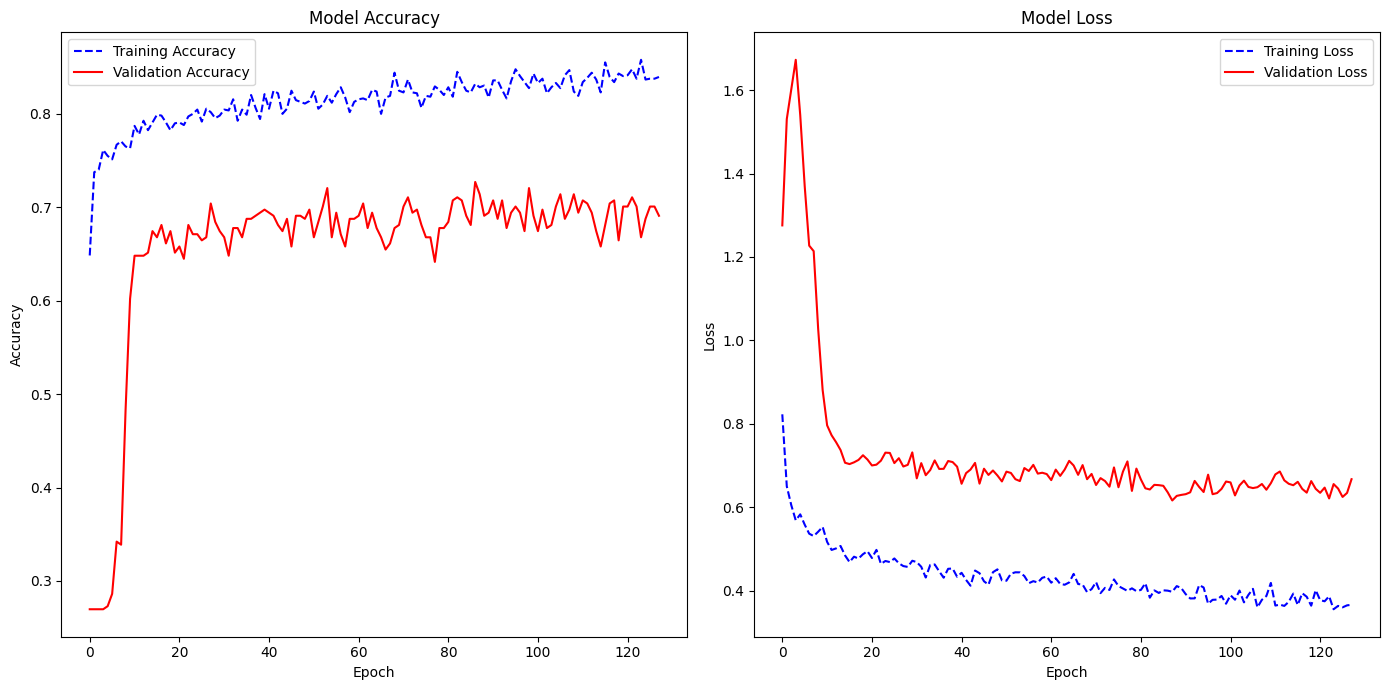


Test Accuracy on y_test: 0.6908
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


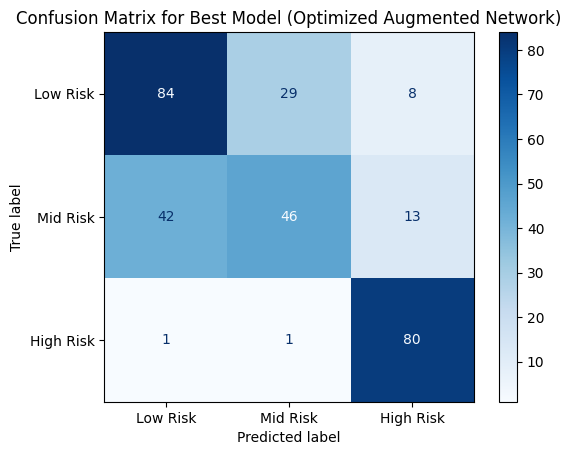


Best Hyperparameters:
Units Layer 1: 96
Activation Layer 1: relu
Dropout Layer 1: 0.1
Units Layer 2: 64
Activation Layer 2: relu
Dropout Layer 2: 0.1
Units Layer 3: 64
Activation Layer 3: tanh
Dropout Layer 3: 0.1
Units Layer 4: 16
Activation Layer 4: tanh
Learning Rate: 0.001634416024259443


In [ ]:
import keras_tuner as kt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the model search space
def build_model(hp):
    model = tf.keras.Sequential()

    # First Dense Layer
    model.add(tf.keras.layers.Dense(
        hp.Int('units_layer_1', min_value=128, max_value=256, step=32),
        activation=hp.Choice('activation_layer_1', ['relu', 'tanh', 'elu']),
        input_shape=(8,)
    ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_layer_1', 0.1, 0.3, step=0.05)))

    # Second Dense Layer
    model.add(tf.keras.layers.Dense(
        hp.Int('units_layer_2', min_value=64, max_value=128, step=32),
        activation=hp.Choice('activation_layer_2', ['relu', 'tanh', 'elu'])
    ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_layer_2', 0.1, 0.3, step=0.05)))

    # Third Dense Layer
    model.add(tf.keras.layers.Dense(
        hp.Int('units_layer_3', min_value=32, max_value=64, step=16),
        activation=hp.Choice('activation_layer_3', ['relu', 'tanh', 'elu'])
    ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_layer_3', 0.05, 0.2, step=0.05)))

    # Fourth Dense Layer
    model.add(tf.keras.layers.Dense(
        hp.Int('units_layer_4', min_value=8, max_value=32, step=8),
        activation=hp.Choice('activation_layer_4', ['relu', 'tanh'])
    ))
    model.add(tf.keras.layers.BatchNormalization())

    # Output Layer
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    # Compile the model
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=32,
    factor=3,
    directory='keras_tuner',
    project_name='optimized_aug_network_tuning'
)

# Search for the best hyperparameters
tuner.search(
    Xa_train_scaled, ya_train,
    validation_data=(Xe_test_scaled, y_test),
    epochs=32,
    batch_size=32,
    verbose=1
)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    Xa_train_scaled, ya_train,
    validation_data=(Xe_test_scaled, y_test),
    epochs=128,
    batch_size=32,
    verbose=1
)

# Plot training and validation metrics
plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linestyle='--', color='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], linestyle='-', color='red', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linestyle='--', color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], linestyle='-', color='red', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(Xe_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy on y_test: {test_accuracy:.4f}")

# Confusion Matrix on ya_test
y_pred = best_model.predict(Xe_test_scaled).argmax(axis=1)  # Convert predictions to class labels
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Risk', 'Mid Risk', 'High Risk'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Best Model (Optimized Augmented Network)")
plt.show()

# Print best hyperparameters
print("\nBest Hyperparameters:")
print(f"Units Layer 1: {best_hps.get('units_layer_1')}")
print(f"Activation Layer 1: {best_hps.get('activation_layer_1')}")
print(f"Dropout Layer 1: {best_hps.get('dropout_layer_1')}")
print(f"Units Layer 2: {best_hps.get('units_layer_2')}")
print(f"Activation Layer 2: {best_hps.get('activation_layer_2')}")
print(f"Dropout Layer 2: {best_hps.get('dropout_layer_2')}")
print(f"Units Layer 3: {best_hps.get('units_layer_3')}")
print(f"Activation Layer 3: {best_hps.get('activation_layer_3')}")
print(f"Dropout Layer 3: {best_hps.get('dropout_layer_3')}")
print(f"Units Layer 4: {best_hps.get('units_layer_4')}")
print(f"Activation Layer 4: {best_hps.get('activation_layer_4')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
